# Deception strategies evaluation

In [668]:
import plotly.offline as pyo
import plotly.io as pio
pio.templates
import seaborn as sns
pyo.init_notebook_mode()
pd.options.plotting.backend = "plotly"
#matplotlib.rc_file_defaults()

In [617]:
%pip install scipy
%pip install seaborn
%pip install pandas
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [633]:
import tqdm
import matplotlib

In [634]:
import numpy as np
import os
import datetime
import yaml
import json
from dotenv import load_dotenv, dotenv_values

import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd

In [635]:
log_dir = os.path.join('/', 'logs','exper', "notebook_dql_debug_with_tinymicro")

load_dotenv(override=True)
env_config = json.loads(json.dumps(dotenv_values()))


## Retrieving data from file with deteciton points results

In [621]:
max_episode_steps = 50
# log_results = os.getenv("LOG_RESULTS", 'False').lower() in ('true', '1', 't')
# gymid = os.getenv("GYMID", 'CyberBattleTinyMicro-v0')
# log_level = os.getenv('LOG_LEVEL', "info")
# iteration_count = None
# eval_episode_count = int(os.getenv('EVAL_EPISODE_COUNT', 0))
# training_episode_count = None
# train_while_exploit = False
# exploit_train = "exploit_train"   # "exploit_manual"

# log_dir = '/root/logs/exper/' + "notebook_dql_debug_with_tinymicro"
# # convert the datetime object to string of specific format
# log_level = os.getenv('LOG_LEVEL', "info")
# checkpoint_name = 'manual' if os.getenv('CHECKPOINT', 'manual').lower() in ('manual') else os.environ['CHECKPOINT'].lower()
iteration_count = None
# checkpoint_date = None

In [622]:
# # %%
iteration_count = max_episode_steps if iteration_count is None else iteration_count
# os.environ['TRAINING_EPISODE_COUNT'] = os.getenv('TRAINING_EPISODE_COUNT', '3000') if training_episode_count is None else str(training_episode_count)
# training_episode_count = int(os.environ['TRAINING_EPISODE_COUNT'])
# checkpoint_date = os.getenv('CHECKPOINT_DATE', '20230124_085534')

# # checkpoint_date = '20230126_233444'

# datetime_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# checkpoint_dir = os.path.join("/root/logs/exper/" + "notebook_dql_debug_with_tinymicro", gymid, checkpoint_date)
# assert checkpoint_name in ('best', 'manual') or checkpoint_name.isnumeric(), f"Checkpoint name {checkpoint_name} is not manual, best or stepsdone number"

# os.environ['LOG_DIR'] = log_dir
# os.environ['LOG_RESULTS'] = str(log_results).lower()

In [1124]:
os.listdir(log_dir)

['CyberBattleTinyMicro-v234',
 'CyberBattleTinyMicro-v1',
 'CyberBattleTinyMicro-v134',
 'CyberBattleTinyMicro-v24',
 'CyberBattleTinyMicro-v3',
 'CyberBattleTinyMicro-v2',
 'CyberBattleTinyMicro-v1234',
 'CyberBattleTinyMicro-v23',
 'deception_results.csv',
 'CyberBattleTinyMicro-v14',
 'CyberBattleTinyMicro-v124',
 'CyberBattleTinyMicro-v34',
 'CyberBattleTinyMicro-v123',
 'CyberBattleTinyMicro-v12',
 'CyberBattleTinyMicro-v13',
 'CyberBattleTinyMicro-v4']

False

In [1126]:
all_expers = {key:[value for value in os.listdir(os.path.join(log_dir, key))] for key in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, key))}
# expers = {"CyberBattleTinyMicro-v1":["20230225_232921"], "wCyberBattleTinyMicro-v100":["20230127_105321", "20230127_105636"]}
all_expers

{'CyberBattleTinyMicro-v234': ['20230414_002921',
  '20230413_142900',
  '20230413_192848'],
 'CyberBattleTinyMicro-v1': ['20230308_180950',
  '20230225_232921',
  '20230308_221855',
  '20230226_120702',
  '20230309_002305',
  '20230226_182453',
  '20230226_141248',
  '20230308_160214',
  '20230226_075238',
  '20230309_022820',
  '20230226_161946',
  '20230226_223520',
  '20230226_013617',
  '20230226_203032',
  '20230309_043353',
  '20230226_034134',
  '20230226_054633',
  '20230225_174102',
  '20230225_130137',
  '20230225_150622',
  '20230308_201442',
  '20230308_135807',
  '20230226_095932',
  '20230225_194508'],
 'CyberBattleTinyMicro-v134': ['20230414_012524',
  '20230413_152426',
  '20230413_202341'],
 'CyberBattleTinyMicro-v24': ['20230412_070913',
  '20230413_222616',
  '20230411_062539',
  '20230411_035341',
  '20230412_033813',
  '20230411_012209',
  '20230413_172833',
  '20230414_033256'],
 'CyberBattleTinyMicro-v3': ['20230225_184307',
  '20230225_160829',
  '20230308_1706

In [1127]:
csr_type_mapping = {'indices': 0, 'indptr': 1, 'eplength': 2}
all_detection_points_results = {}
for gymid in all_expers:
    for date in all_expers[gymid]:
        checkpoint_dir = os.path.join(log_dir, gymid, date)
        csr_matrix = np.load(os.path.join(checkpoint_dir, 'training', 'detection_points_results.npz'))
        
        exper_name = gymid + '.' + date
        all_detection_points_results[exper_name] = {}
        for key in csr_matrix:
            name, data_type = '_'.join(key.split('_')[:-1]), key.split('_')[-1]
            all_detection_points_results[exper_name][name] = all_detection_points_results[exper_name].get(name, dict())
            all_detection_points_results[exper_name][name].update({data_type: csr_matrix[key]})
            

# all_detection_points_dict = {}
# for exper in all_detection_points_results:
#     for k in all_detection_points_results[exper].keys():
#         name, data_type = '_'.join(k.split('_')[:-1]), k.split('_')[-1]
#         all_detection_points_dict[exper + '.' + name] = all_detection_points_dict.get(exper + '.' + name, dict())
#         all_detection_points_dict[exper + '.' + name].update({data_type: all_detection_points_results[exper][k]})

expers = {key: [all_expers[key][-1]] for key in all_expers if len(all_expers[key])}
detection_points_results = {exper_name: value for exper_name, value in all_detection_points_results.items() 
                         if exper_name.split('.')[1] in ''.join(map(lambda x: ''.join(x), expers.values()))}
expers

{'CyberBattleTinyMicro-v234': ['20230413_192848'],
 'CyberBattleTinyMicro-v1': ['20230225_194508'],
 'CyberBattleTinyMicro-v134': ['20230413_202341'],
 'CyberBattleTinyMicro-v24': ['20230414_033256'],
 'CyberBattleTinyMicro-v3': ['20230226_192759'],
 'CyberBattleTinyMicro-v2': ['20230226_230811'],
 'CyberBattleTinyMicro-v1234': ['20230226_033125'],
 'CyberBattleTinyMicro-v23': ['20230411_004920'],
 'CyberBattleTinyMicro-v14': ['20230413_162549'],
 'CyberBattleTinyMicro-v124': ['20230413_145642'],
 'CyberBattleTinyMicro-v34': ['20230411_065804'],
 'CyberBattleTinyMicro-v123': ['20230308_100136'],
 'CyberBattleTinyMicro-v12': ['20230308_033438'],
 'CyberBattleTinyMicro-v13': ['20230410_235055'],
 'CyberBattleTinyMicro-v4': ['20230308_173948']}

### Logfile check

In [1136]:
exper_name = 'CyberBattleTinyMicro-v' + '1234'
data = pd.read_csv(os.path.join(log_dir, exper_name, expers[exper_name][-1], 'logfile.log'), header=None)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1009330/1355228785.py", line 2, in <module>
    data = pd.read_csv(os.path.join(log_dir, exper_name, expers[exper_name][-1], 'logfile.log'), header=None, columns=['newline'])
TypeError: read_csv() got an unexpected keyword argument 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1199, in structured_traceback
    return Ver

In [ ]:
data

## Pandas DF

In [594]:
df_columns=['gymid', 'date', 'dp_name', 'indices','epnumber' ,'eplength']
# [int(step) for step in x[1:-1].replace(' ', '').split(',') if step.strip()]
try:
    df = pd.read_csv(os.path.join(log_dir, "deception_results.csv"), sep='|', header=0,
                     names=df_columns, dtype=dict(zip(df_columns, ['str', 'str', 'str', 'str', int, int])),
                     converters={'indices': lambda str_list: [int(step) 
                                                             for step in str_list[1:-1].replace(' ', ',').replace("'", "").split(',') 
                                                             if step]},
                     parse_dates=['date'], date_format="%Y%m%d_%H%M%S")
except FileNotFoundError:
    df = pd.DataFrame([], columns=df_columns)
    for exper_name in tqdm.tqdm(detection_points_results):
        version, date = exper_name.split('.')
        for dp_name in detection_points_results[exper_name]:
            results = detection_points_results[exper_name][dp_name]
            indptr, indices, eplength = results['indptr'], results['indices'], results['eplength']
            for n, (indptr_start, indptr_end) in enumerate(zip(indptr[:-1], indptr[1:])):
                df = pd.concat([df, 
                                pd.DataFrame([[version, date, dp_name, indices[indptr_start:indptr_end], 
                                               n, eplength[n]]], 
                                               columns=df.columns)], ignore_index=True)   

/tmp/ipykernel_1009330/989705688.py:4: ParserWarning:

Both a converter and dtype were specified for column indices - only the converter will be used.



In [595]:
### Saving: wdf.to_csv(os.path.join(log_dir, "deception_results.csv"), sep='|')

In [596]:
#pd.DataFrame.groupby(
valid_indexes = df['indices'].map(lambda x: len(x) > 0)
df_valid_episodes = df[valid_indexes].copy()


In [597]:
df_valid_episodes.groupby(lambda x: len(df.loc[x]["gymid"].split('-v')[-1])).size().rename("hts", inplace=True)
df_valid_episodes.style
print("Ratio: eps_with_hts/eps", len(df[valid_indexes].index)/len(df.index)*100)

Ratio: eps_with_hts/eps 16.89994692302646


In [598]:
df_valid_episodes

gymid                date                 dp_name   
153     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin  \
233     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
248     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
251     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
261     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
...                           ...                 ...                     ...   
167549    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167550    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167572    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167592    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167667    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   

       indices  epnumber  eplength  
153       [47]       153        50  
233       [45]       233        50  
248       [48]       248        50  
251       [24]       251        50  
261       [49]       261        50  
...        ...       ...       ...  
167549     [4]      1404        50  
167550    [48]      1405        50  
167572    [42]      1427        50  
167592    [22]      1447        50  
167667    [37]      1522        50  

[28338 rows x 6 columns]

In [601]:
df_valid_episodes["dp_name"].value_counts()

dp_name
DP_admin                  12582
HT1_v2tov1                 6067
HT3_state                  3970
DP_calendar                2234
HT2_phonebook              1882
DP_sqlinjectusername       1153
HT4_cloudactivedefense      450
Name: count, dtype: int64

In [599]:
df['gymid']

0         CyberBattleTinyMicro-v234
1         CyberBattleTinyMicro-v234
2         CyberBattleTinyMicro-v234
3         CyberBattleTinyMicro-v234
4         CyberBattleTinyMicro-v234
                    ...            
167676      CyberBattleTinyMicro-v4
167677      CyberBattleTinyMicro-v4
167678      CyberBattleTinyMicro-v4
167679      CyberBattleTinyMicro-v4
167680      CyberBattleTinyMicro-v4
Name: gymid, Length: 167681, dtype: object

### Plotting

In [344]:
df_valid_episodes.columns

Index(['gymid', 'date', 'dp_name', 'indices', 'epnumber', 'eplength'], dtype='object')

In [345]:
df["n_ht"] = df["gymid"].apply(lambda x: len(x.split('-v')[-1]))
df_valid_episodes["n_ht"] = df_valid_episodes["gymid"].apply(lambda x: len(x.split('-v')[-1]))
df_valid_episodes["first_ind"] = df_valid_episodes["indices"].apply(lambda x: x[0])

In [346]:
grouped = df.groupby("n_ht")
valid_grouped = df_valid_episodes.groupby("n_ht")

In [347]:
df_valid_episodes.loc[df_valid_episodes["n_ht"] == 2, "indices"][:100].apply(lambda x: x[0]).mean()

16.07

In [348]:
valid_grouped.nth[:100].groupby("n_ht").apply(lambda x : x["indices"].apply(lambda y: y[-1])).groupby("n_ht")

In [350]:
df["n_ht"].unique()

array([3, 1, 2, 4])

In [419]:
len(df["dp_name"].unique())

len(fig.data)

9

In [428]:
import plotly.graph_objects as go
from ipywidgets import interact

In [493]:
valid_grouped.nth[:num_epsiodes].groupby(["n_ht", "dp_name"]).\
    apply(lambda x : x["indices"].apply(lambda y: y[0])).\
    groupby(["n_ht", "dp_name"]).mean().unstack(level=1)

dp_name   DP_admin  DP_calendar  DP_sqlinjectusername  HT1_v2tov1   
n_ht                                                                
1        10.867708    28.815534             29.185410   16.293640  \
2        10.540431    28.668199             27.844133   21.484085   
3        11.530680    29.115741             28.696833   22.364103   
4        11.960557    31.364583             28.531250   21.454286   

dp_name  HT2_phonebook  HT3_state  HT4_cloudactivedefense  
n_ht                                                       
1            25.222772  26.810000               26.708738  
2            27.268718  24.707478               24.537778  
3            28.968750  25.033421               27.986111  
4            28.403727  25.547917               21.580000

In [584]:
df_valid_episodes["dp_name"].unique()

array(['DP_admin', 'DP_calendar', 'DP_sqlinjectusername', 'HT1_v2tov1',
       'HT3_state', 'HT4_cloudactivedefense', 'HT2_phonebook'],
      dtype=object)

In [579]:
import plotly.express as px


vis_df = df_valid_episodes.groupby(["n_ht", "dp_name"]).\
    apply(lambda x : x["indices"].apply(lambda y: y[0])).\
    groupby(["n_ht", "dp_name"])
# fig = px.scatter(vis_df, x="n_ht", animation_frame="year", animation_group="country",
#            size="pop", color="continent", hover_name="country",
#            log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [581]:
vis_df.mean()

n_ht  dp_name               
1     DP_admin                  10.867708
      DP_calendar               28.815534
      DP_sqlinjectusername      29.185410
      HT1_v2tov1                16.293640
      HT2_phonebook             25.222772
      HT3_state                 26.810000
      HT4_cloudactivedefense    26.708738
2     DP_admin                  10.540431
      DP_calendar               28.668199
      DP_sqlinjectusername      27.844133
      HT1_v2tov1                21.484085
      HT2_phonebook             27.268718
      HT3_state                 24.707478
      HT4_cloudactivedefense    24.537778
3     DP_admin                  11.530680
      DP_calendar               29.115741
      DP_sqlinjectusername      28.696833
      HT1_v2tov1                22.364103
      HT2_phonebook             28.968750
      HT3_state                 25.033421
      HT4_cloudactivedefense    27.986111
4     DP_admin                  11.960557
      DP_calendar               31.364583
     

In [578]:
vis_df['cum_sum'] = vis_df.apply(lambda p: p.shift(fill_value=0).cumsum())
vis_df['cum_mean'] = vis_df['cum_sum'] / vis_df.cumcount()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1009330/779827038.py", line 1, in <module>
    vis_df['cum_sum'] = vis_df.apply(lambda p: p.shift(fill_value=0).cumsum())
TypeError: 'SeriesGroupBy' object does not support item assignment

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/p

In [520]:
vis_df.reset_index(0).drop(columns='n_ht').index

vis_df.index

vis_df = vis_df.reset_index(1).reset_index(1)
#vis_df.columns = ['index',  'indices']
vis_df

vis_df.groupby("n_ht").apply()

import plotly.express as px

fig = px.line(vis_df, x="n_ht", y="indices"
fig.show()

MultiIndex([(1,  9887),
            (1,  9891),
            (1,  9892),
            (1,  9893),
            (1,  9894),
            (1,  9895),
            (1,  9896),
            (1,  9897),
            (1,  9902),
            (1,  9903),
            ...
            (4, 71642),
            (4, 71643),
            (4, 71645),
            (4, 71665),
            (4, 71697),
            (4, 71703),
            (4, 71705),
            (4, 71717),
            (4, 71756),
            (4, 71798)],
           names=['n_ht', None], length=28338)

In [643]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Line(
            visible=False,
            line=dict(color="#00CED1", width=6),
            #name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
go.Scatter.update()

In [940]:
valid_grouped.nth[:num_epsiodes].groupby(["n_ht"]).\
    filter(lambda x: "DP" not in x["dp_name"])

gymid                date                 dp_name   
153     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin  \
233     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
248     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
251     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
261     CyberBattleTinyMicro-v234 2023-04-13 19:28:48                DP_admin   
...                           ...                 ...                     ...   
167549    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167550    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167572    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167592    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   
167667    CyberBattleTinyMicro-v4 2023-03-08 17:39:48  HT4_cloudactivedefense   

       indices  epnumber  eplength  n_ht  first_ind  
153       [47]       153        50     3         47  
233       [45]       233        50     3         45  
248       [48]       248        50     3         48  
251       [24]       251        50     3         24  
261       [49]       261        50     3         49  
...        ...       ...       ...   ...        ...  
167549     [4]      1404        50     1          4  
167550    [48]      1405        50     1         48  
167572    [42]      1427        50     1         42  
167592    [22]      1447        50     1         22  
167667    [37]      1522        50     1         37  

[28338 rows x 8 columns]

In [853]:
df_valid_episodes.groupby(["n_ht","epnumber"])

In [895]:
df_valid_episodes.sort_values(['epnumber']).groupby(["n_ht","gymid"]).get_group(
    (1, "CyberBattleTinyMicro-v1"))["dp_name"].value_counts()

dp_name
DP_admin                1481
HT1_v2tov1               739
DP_calendar               89
DP_sqlinjectusername      34
Name: count, dtype: int64

In [838]:
df_valid_episodes.groupby(["n_ht","gymid"]).nth[:10000].groupby(["n_ht","gymid"]).get_group((1, "CyberBattleTinyMicro-v1"))["dp_name"].value_counts()

dp_name
DP_admin                1481
HT1_v2tov1               739
DP_calendar               89
DP_sqlinjectusername      34
Name: count, dtype: int64

In [965]:
print(slice_episodes)
df_valid_episodes.sort_values(['epnumber']).groupby(["n_ht","gymid"]).\
        nth[slice_episodes].groupby(["n_ht", "dp_name"]).\
        apply(lambda x : x["indices"].apply(lambda y: y[0])).\
        unstack(level=1).assign(avg=lambda x: x.mean(axis=1)).rename({"avg": 'DPs+' * True + 'HTs'}).\
        stack().groupby(["n_ht", "dp_name"]).\
        mean().unstack(level=1)

slice(None, 28338, None)


dp_name   DP_admin  DP_calendar  DP_sqlinjectusername  HT1_v2tov1   
n_ht                                                                
1        10.867708    28.815534             29.185410   16.293640  \
2        10.540431    28.668199             27.844133   21.484085   
3        11.530680    29.115741             28.696833   22.364103   
4        11.960557    31.364583             28.531250   21.454286   

dp_name  HT2_phonebook  HT3_state  HT4_cloudactivedefense        avg  
n_ht                                                                  
1            25.222772  26.810000               26.708738  16.345047  
2            27.268718  24.707478               24.537778  17.839639  
3            28.968750  25.033421               27.986111  20.713702  
4            28.403727  25.547917               21.580000  21.544615

In [967]:
df_valid_episodes.sort_values(['epnumber']).groupby(["n_ht","gymid"]).size()

n_ht  gymid                     
1     CyberBattleTinyMicro-v1       2343
      CyberBattleTinyMicro-v2       1148
      CyberBattleTinyMicro-v3       1268
      CyberBattleTinyMicro-v4       1672
2     CyberBattleTinyMicro-v12      3356
      CyberBattleTinyMicro-v13      2089
      CyberBattleTinyMicro-v14      1740
      CyberBattleTinyMicro-v23      2397
      CyberBattleTinyMicro-v24      1216
      CyberBattleTinyMicro-v34       832
3     CyberBattleTinyMicro-v123     2036
      CyberBattleTinyMicro-v124     2400
      CyberBattleTinyMicro-v134     2021
      CyberBattleTinyMicro-v234     1870
4     CyberBattleTinyMicro-v1234    1950
dtype: int64

In [997]:
df_valid_episodes["dp_name"].unique()

array(['DP_admin', 'DP_calendar', 'DP_sqlinjectusername', 'HT1_v2tov1',
       'HT3_state', 'HT4_cloudactivedefense', 'HT2_phonebook'],
      dtype=object)

In [1112]:
def vis_n_hts_to_metric(df_valid_episodes = df_valid_episodes, 
                        metrix='first_occur', flag_include_DP = True, 
                        start_ep = 0, end_ep = None,
                       filename='', image_hw = None) -> None:
    '''
    Function to visualize different metrics from the number of Honeytokens'''
                        
                        
    image_h, image_w = image_hw if image_hw else (None, None)
    valid_grouped = df_valid_episodes.sort_values(['epnumber']).groupby(["n_ht","gymid"])
    num_episodes = valid_grouped.size().max()
    if end_ep is None:
        end_ep = num_episodes
    slice_episodes = slice(start_ep, end_ep)
    
    dp_names = df_valid_episodes.sort_values(['epnumber']).\
        groupby(["n_ht","gymid"])["dp_name"].nth[slice_episodes].unique()
    #print(dp_names)
    color_dict = dict(zip(np.concatenate((dp_names, ['DPs+' * flag_include_DP + 'HTs'])), 
                          [px.colors.qualitative.Alphabet[i] \
                           for i, dp_name in enumerate(df_valid_episodes["dp_name"].unique()) if dp_name in dp_names]  + 
                          [px.colors.qualitative.Alphabet[-1]])) 
    # {'red zero line': '#FF0000', 'blue one line': '#0000FF'}
    
    boolean_not_include = ~df_valid_episodes["dp_name"].str.contains("DP") if not flag_include_DP else slice(None, None)
    fig = df_valid_episodes.sort_values(['epnumber']).groupby(["n_ht","gymid"]).\
        nth[slice_episodes].groupby(["n_ht", "dp_name"]).\
        apply(lambda x : x["indices"].apply(lambda y: y[0])).\
        unstack(level=1).\
        stack().groupby(["n_ht", "dp_name"]).\
        mean().unstack(level=1).plot()
    
    #.assign(avg=lambda x:  x[boolean_not_include][[column for column in x.columns if not flag_include_DP or "DP" in column]].mean(axis=1)).rename(columns={"avg": }).
    
    fig.add_trace(df_valid_episodes[boolean_not_include].groupby("n_ht").nth[slice_episodes].groupby(["n_ht"]).\
        apply(lambda x : x["indices"].apply(lambda y: y[0])).\
        groupby(["n_ht"]).mean().plot().data[0].update(name='DPs+' * flag_include_DP + 'HTs'))
    #go.Scatter(x=, y=, mode='line+marker', name='DPs+HTs')
    fig.update_layout(
        xaxis = dict(
            range=[0, 5],
            #tickmode = 'linear',
            tickvals = df["n_ht"].unique(),
            tickmode = 'array'
            #dtick = 0.75
        ),
        title=f"Mean over first {end_ep - start_ep} occurencies in all episode",
        yaxis_title="First occurance (mean)",
        xaxis_title= "Number of honeytokens"
    #     uniformtext_minsize=8, uniformtext_mode='hide'
    ).update_traces(mode='lines+markers', textposition='top center',
                            #marker_line_color= px.colors.discrete.Plasma_r[:7],
        #marker=dict(size=10,line=dict(width=0.5,color='DarkSlateGrey')),
                    #marker=dict(color=px.colors.sequential.Plasma_r)) # , layout=(2, 3)
    #                   selector=dict(mode='lines+markers')
    )

    for j in range(len(valid_grouped.nth[slice_episodes]["dp_name"].unique()) + 1): 
        for i in range(len(fig.data[j].x)):
            fig.data[i].line.color = px.colors.qualitative.Alphabet[i]
            alpha = np.pi*(2*np.random.rand() -1)
            fig.add_annotation(
                x=fig.data[j].x[i] - (-1)**j*np.cos(alpha)/4,
                y=fig.data[j].y[i] - (-1)**(j-1)*np.sin(alpha)/4,
                text= f"{fig.data[j].y[i]:.2f}", #f"Point {i+1}",
                showarrow=False,
                yanchor= 'middle',
                #arrowhead=7,
        #         ax=100,
        #         ay=100000
        )
            

    #pd.options.plotting.backend = "none"
    #ax.set_xticks(df["n_ht"].unique())
    
    style_templates = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
    template = style_templates[-1]
    fig.update_layout(template=template)
    fig.show()
    if filename:
        pio.write_image(fig, filename, width=image_w, height=image_h)



In [1115]:
vis_n_hts_to_metric(flag_include_DP=False, end_ep=1000)

In [1114]:
vis_n_hts_to_metric(flag_include_DP=True, end_ep=1000)

In [1120]:
end_ep = 2000
for form in ['pdf', 'png']:
    vis_n_hts_to_metric(flag_include_DP=False, end_ep = end_ep, filename=os.path.join('/', 'logs', 'exper', 
                                                                     f"first_occur_htsA_dpsNA_eps{(str(end_ep) if end_ep else 'A')}.{form}"))
    vis_n_hts_to_metric(flag_include_DP=True, end_ep = end_ep, filename=os.path.join('/', 'logs', 'exper', 
                                                                     f"first_occur_htsA_dpsA_eps{(str(end_ep) if end_ep else 'A')}.{form}"))

In [747]:
style_templates = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
template = style_templates[-2]
fig.update_layout(template=template)
fig.show()

<AxesSubplot: title={'center': 'first_ind'}, xlabel='n_ht'>

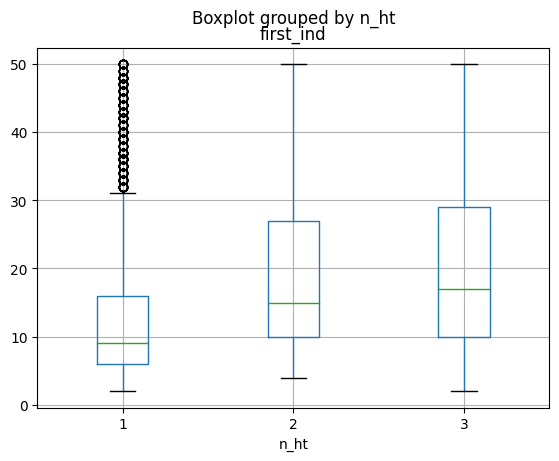

In [82]:
df_valid_episodes.boxplot(by="n_ht", column="first_ind")

In [592]:
valid_grouped["indices"].apply(lambda x: len(x)).plot()

1         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3             AxesSubplot(0.1,0.15;0.363636x0.340909)
4        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

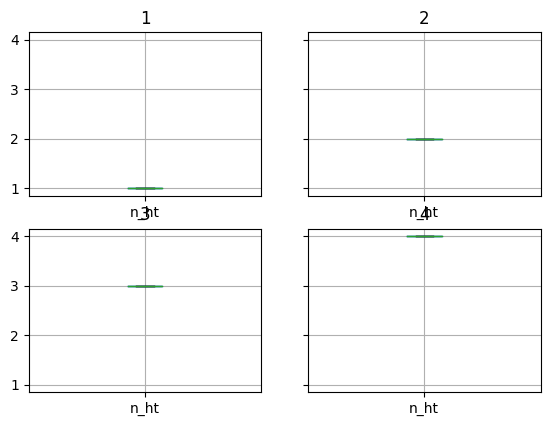

In [115]:
valid_grouped.boxplot(column='n_ht')

In [99]:
first_n_eps =  50
grouped[["indices", "epnumber"]].filter(lambda x:w (x["epnumber"] < first_n_eps).any()).apply(lambda x: x.loc[valid_indexes, "indices"].apply(lambda indices: indices[0]).mean()).plot(
    ylabel="First occurence", marker='o', xticks=list(grouped.groups.keys()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_896572/4020034505.py", line 2, in <module>
    grouped[["indices", "epnumber"]].filter(lambda x: (x["epnumber"] < first_n_eps).any()).apply(lambda x: x.loc[valid_indexes, "indices"].apply(lambda indices: indices[0]).mean()).plot(
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py", line 9428, in apply
    return op.apply().__finalize__(self, method="apply")
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/apply.py", line 678, in apply
    return self.apply_standard()
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/apply.py", line 798, in apply_standard
    results, res_index = self.apply_series_generator()
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/apply.py", line 814, in apply_series_generator
    results[i] = self.f(v

<AxesSubplot: xlabel='n_ht', ylabel='First occurence'>

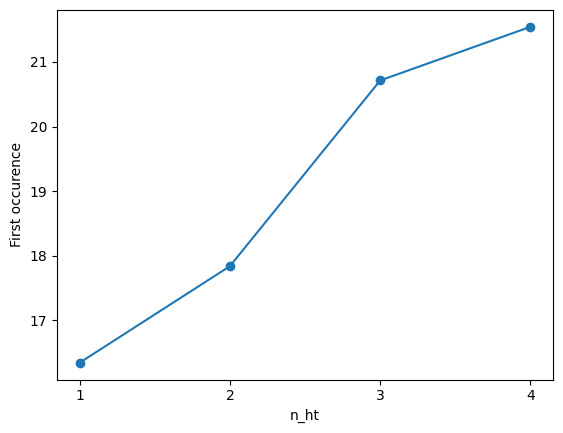

In [67]:
grouped.apply(lambda x: x.loc[valid_indexes, "indices"].apply(lambda indices: indices[0]).mean()).plot(
    ylabel="First occurence", marker='o', xticks=list(grouped.groups.keys()))

In [33]:
valid_grouped.get_group(2).columns

Index(['gymid', 'date', 'indices', 'eplength', 'n_ht'], dtype='object')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_896572/1351047965.py", line 1, in <module>
    valid_grouped.boxplot(column="indices", subplots=False)
  File "/usr/local/lib/python3.9/dist-packages/pandas/plotting/_core.py", line 597, in boxplot_frame_groupby
    return plot_backend.boxplot_frame_groupby(
  File "/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/boxplot.py", line 540, in boxplot_frame_groupby
    ret = df.boxplot(
  File "/usr/local/lib/python3.9/dist-packages/pandas/plotting/_core.py", line 507, in boxplot_frame
    return plot_backend.boxplot_frame(
  File "/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/boxplot.py", line 469, in boxplot_frame
    ax = boxplot(
  File "/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/boxplot.py", line 446, in boxpl

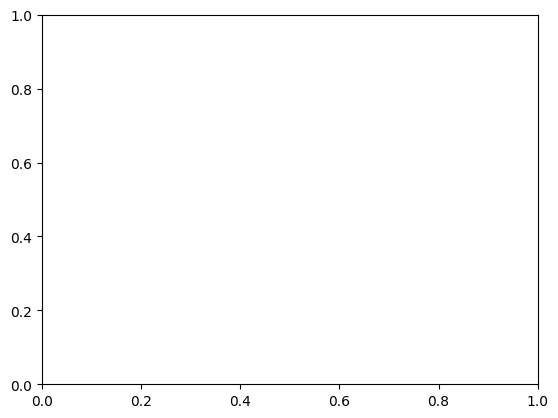

In [35]:
valid_grouped.boxplot(column="indices", subplots=False)

df.groupby("n_ht").plot(x='n_ht'subplots=False, kind='scatter')

df.groupby("n_ht").plot(y="eplength", kind='box')

## Appendix

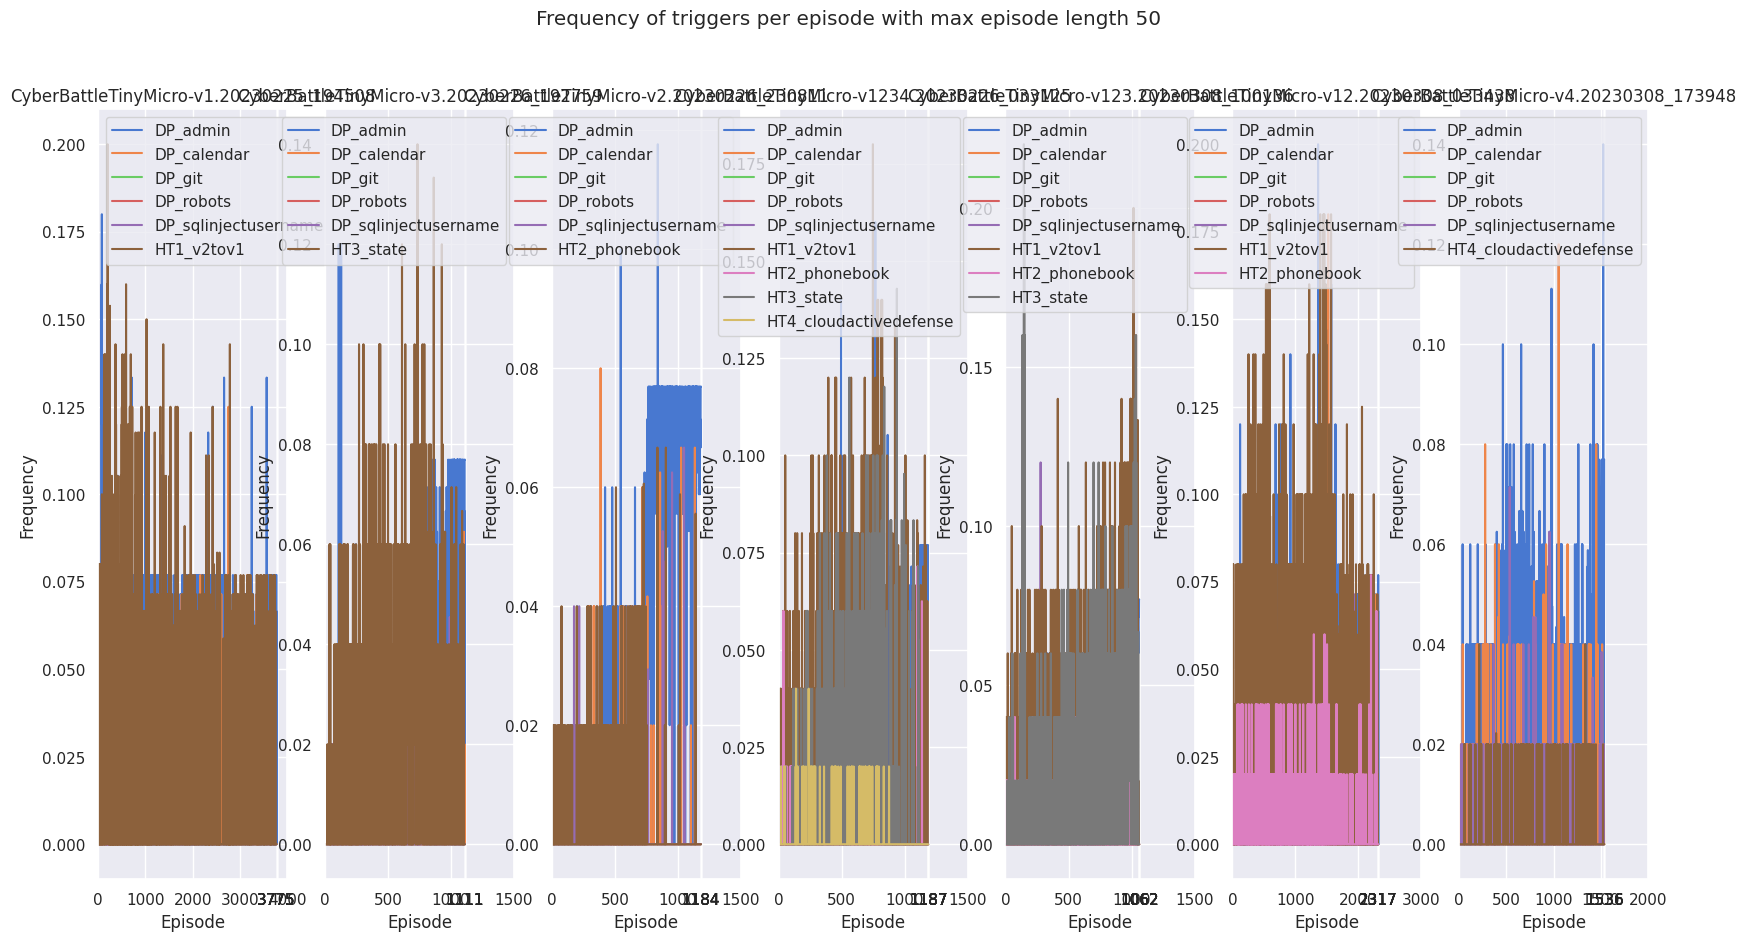

In [38]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
nrows, ncols=max(len(expers[gymid]) for gymid in expers),len(expers)
axes = {}

detection_points_dict = 
fig = plt.figure(figsize=(20, 10))
for name in detection_points_dict:
    gymid, date, detection_point = name.split('.')
    j, i = list(expers.keys()).index(gymid), expers[gymid].index(date)
    if (i, j) not in axes:
        ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
        axes[(i, j)] = ax
    else:
        ax = axes[(i, j)]
    n_occurencies = len(detection_points_dict[name]['indices'])
    N = len(detection_points_dict[name]['eplength'])

        n_occur_per_episode = np.ravel(np.array(all_occur.sum(axis=1)))
        # only episodes which have nonzero inclusions
        if freq_not_count:
            freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0] / \
                eplength[-n_last_episodes:][n_occur_per_episode[-n_last_episodes:] > 0]
        else:
            freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0]
        freq_occur_per_episode = freq_occur_per_episode if len(freq_occur_per_episode) else [0]*n_epis
        ax.bar(w_M / 2 + dp_index / N + exper_index * w_M, freq_occur_per_episode.mean(), width=w_M, color=color[exper_index], align='center', label=exper_name)

    all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, detection_points_dict[name]['indices'], detection_points_dict[name]['indptr']), shape=(N, iteration_count))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    freq_occur_per_episode = n_occur_per_episode / detection_points_dict[name]['eplength']
    ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Frequency")
    #ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
    eplength = len(detection_points_dict[name]['eplength'])
    ax.set_xlim(0, eplength + 1)
    ax.set_title(gymid + '.' + date)
    extraxticks = [len(detection_points_dict[name]['eplength'])]
    ax.set_xticks(list(ax.get_xticks()) + extraxticks)
    ax.legend()
_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

In [95]:
all_expers.keys()

dict_keys(['CyberBattleTinyMicro-v1', 'CyberBattleTinyMicro-v3', 'CyberBattleTinyMicro-v2', 'CyberBattleTinyMicro-v1234', 'CyberBattleTinyMicro-v123', 'CyberBattleTinyMicro-v12', 'CyberBattleTinyMicro-v4'])

1


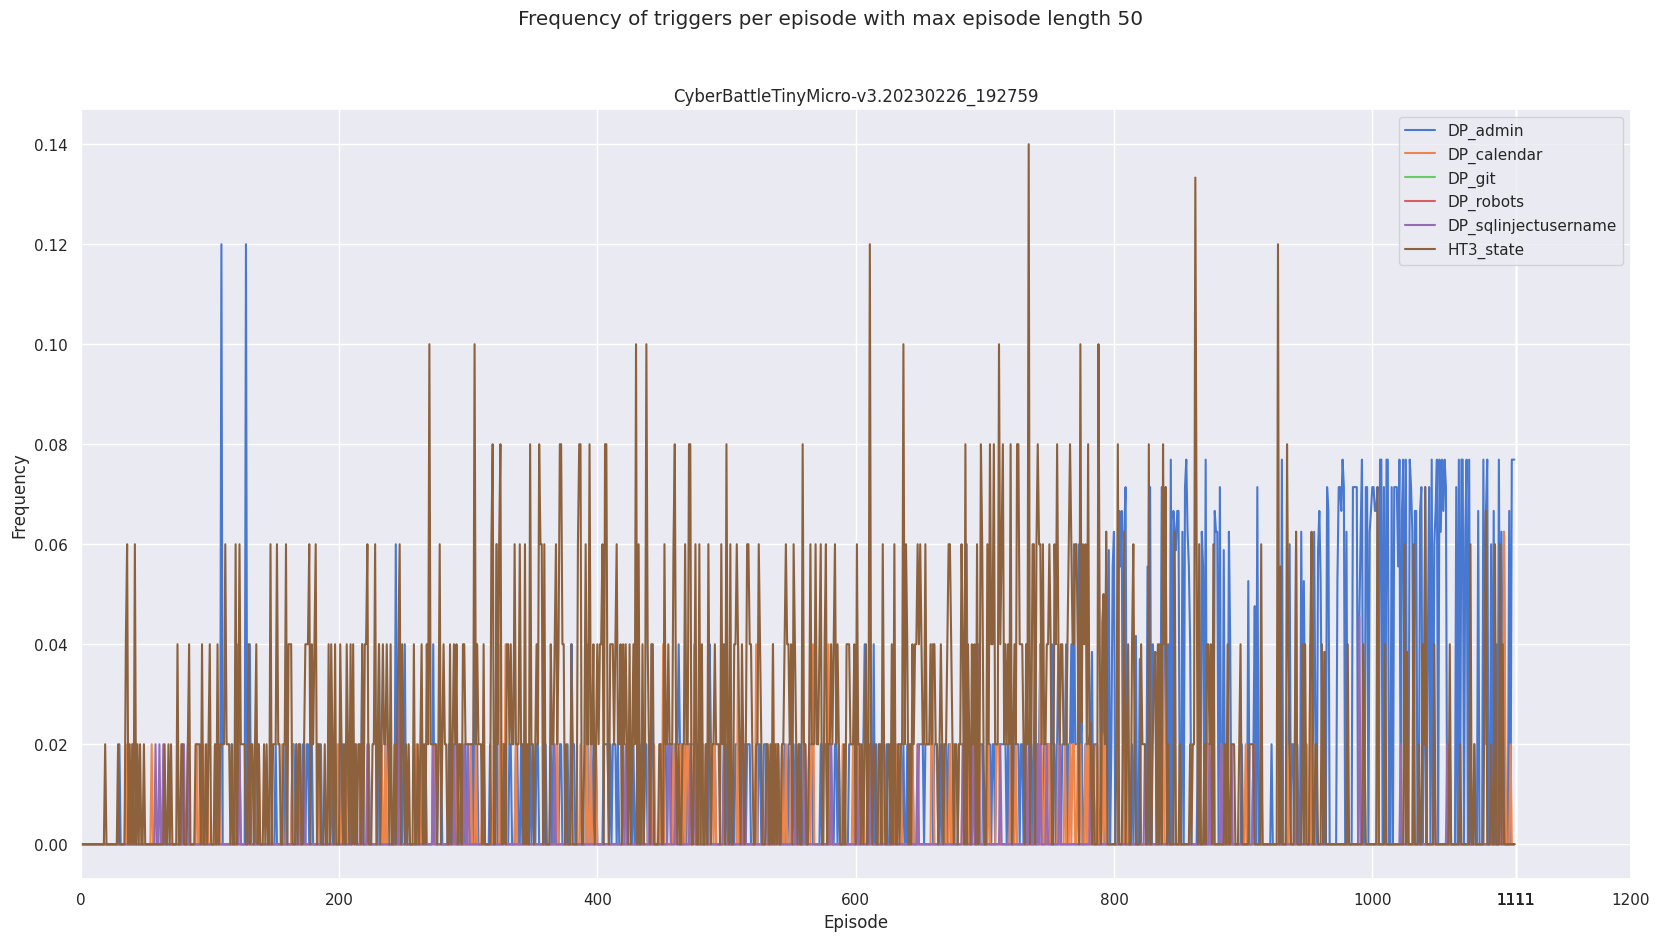

In [94]:
expers = {key: [all_expers[key][-1]] for key in all_expers if 'v3' in key}
detection_points_results = {exper_name: value for exper_name, value in all_detection_points_results.items() 
                         if exper_name.split('.')[1] in ''.join(map(lambda x: ''.join(x), expers.values()))}

print(len(detection_points_results))

sns.set(style="darkgrid", palette="muted", color_codes=True)
nrows, ncols=max(len(expers[gymid]) for gymid in expers),len(expers)
axes = {}

fig = plt.figure(figsize=(20, 10))
for exper_name, dp_name in detection_points_results.items():
    for detection_point in dp_name:
        gymid, date = exper_name.split('.')
        j, i = list(expers.keys()).index(gymid), expers[gymid].index(date)
        if (i, j) not in axes:
            ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
            axes[(i, j)] = ax
        else:
            ax = axes[(i, j)]
        csr_matrix_lists = detection_points_results[exper_name][detection_point]
        n_occurencies = len(csr_matrix_lists['indices'])
        N = len(csr_matrix_lists['eplength'])

        # n_episodes x 50: 1

        all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, csr_matrix_lists['indices'], csr_matrix_lists['indptr']), shape=(N, iteration_count))
        n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
        freq_occur_per_episode = n_occur_per_episode / csr_matrix_lists['eplength']
        ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
        ax.set_xlabel("Episode")
        ax.set_ylabel("Frequency")
        #ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
        eplength = len(csr_matrix_lists['eplength'])
        ax.set_xlim(0, eplength)
        ax.set_title(gymid + '.' + date)
        extraxticks = [len(csr_matrix_lists['eplength'])]
        ax.set_xticks(list(ax.get_xticks()) + extraxticks)
        ax.legend()
    _ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

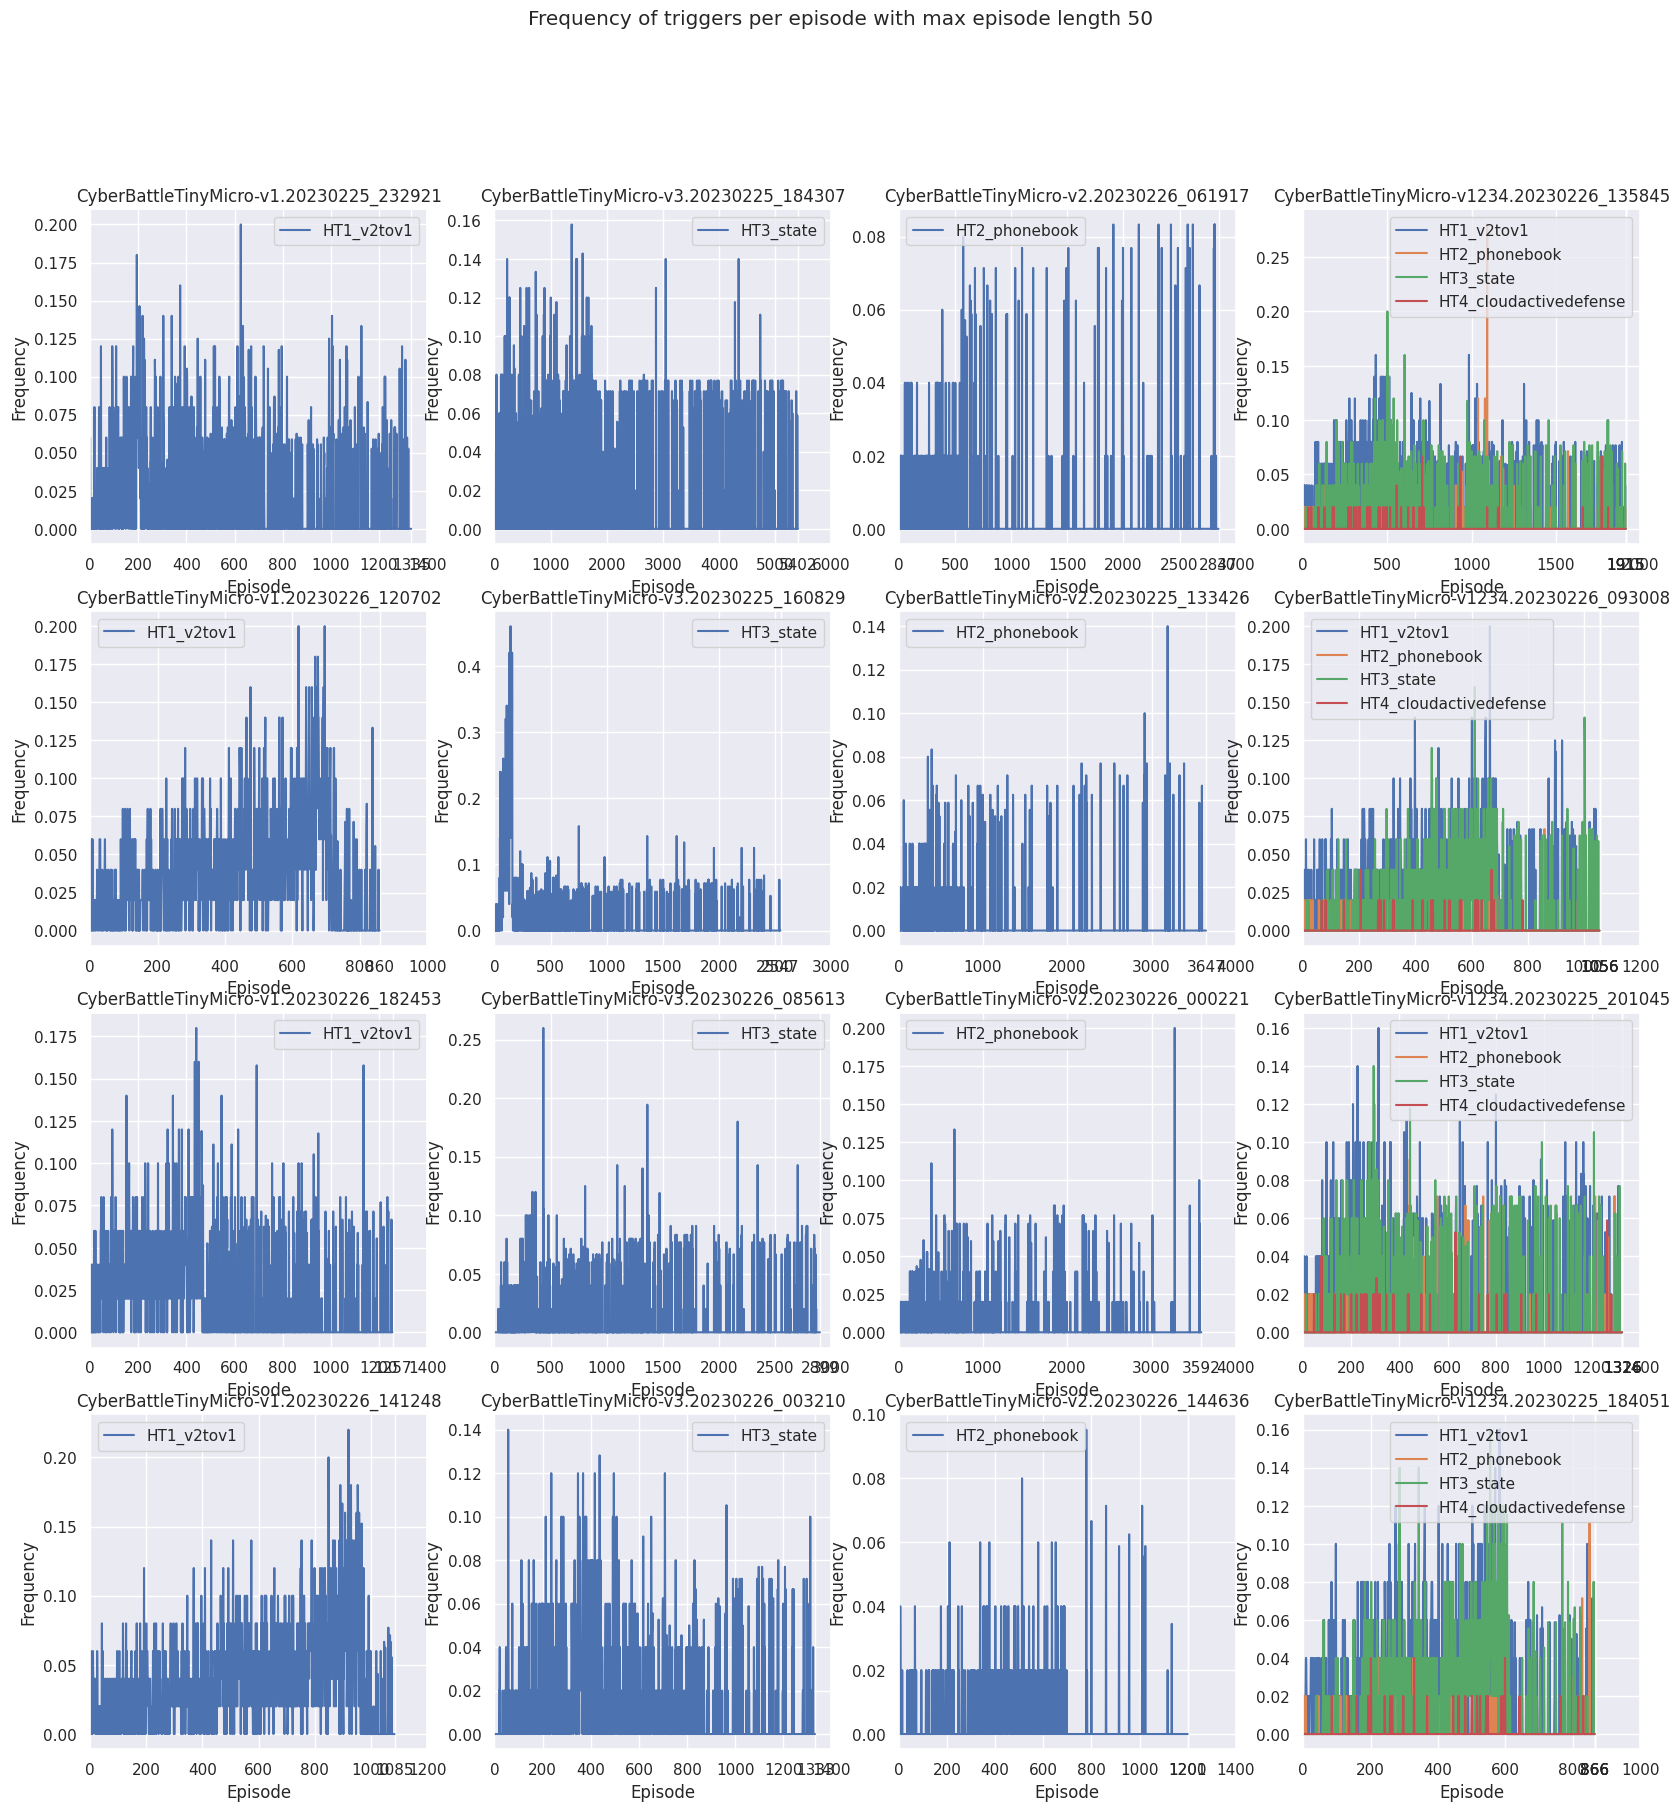

In [200]:
cur_expers = {key: [date for j, date in enumerate(all_expers[key]) if j <= 3] for i, key in enumerate(all_expers.keys()) if i <= 3 } # {"CyberBattleTinyMicro-v1":["20230127_105836"], "CyberBattleTinyMicro-v100":["20230127_105321", "20230127_105636"]}

detection_points_npz = {}
for gymid in cur_expers:
    for date in cur_expers[gymid]:
        checkpoint_dir = os.path.join(log_dir, gymid, date)
        detection_points_npz[gymid + '.' + date] = np.load(os.path.join(checkpoint_dir, 'training',
                                                                            'detection_points_results.npz'))

detection_point_names = set()
detection_points_indices = {}
for exper in detection_points_npz:
    for k in detection_points_npz[exper].keys():
        ht_dp_name, csr_index_type = '_'.join(k.split('_')[:-1]), k.split('_')[-1]
        if not include_dps and "dp" in ht_dp_name.lower():
            continue
        detection_point_names |= {ht_dp_name}
        detection_points_indices[exper + '.' + ht_dp_name] = detection_points_indices.get(exper + '.' + ht_dp_name, dict())
        detection_points_indices[exper + '.' + ht_dp_name].update({csr_index_type: detection_points_npz[exper][k]})
dp_names = sorted(list((detection_point_names)))
exper_names = sorted(list(detection_points_npz.keys()))

nrows, ncols=max(len(cur_expers[gymid]) for gymid in cur_expers), len(cur_expers)
axes = {}

fig = plt.figure(figsize=(20, 20))
for name in detection_points_indices:
    gymid, date, detection_point = name.split('.')
    j, i = list(cur_expers.keys()).index(gymid), cur_expers[gymid].index(date)
    if (i, j) not in axes:
        ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
        axes[(i, j)] = ax
    else:
        ax = axes[(i, j)]
    n_occurencies = len(detection_points_indices[name]['indices'])
    N = len(detection_points_indices[name]['eplength'])

    # n_episodes x 50: 1

    all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, detection_points_indices[name]['indices'], detection_points_indices[name]['indptr']), shape=(N, iteration_count))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    freq_occur_per_episode = n_occur_per_episode / detection_points_indices[name]['eplength']
    ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Frequency")

    eplength = len(detection_points_indices[name]['eplength'])
    ax.set_xlim(0, eplength)
    ax.set_title(gymid + '.' + date)
    extraxticks = [len(detection_points_indices[name]['eplength'])]
    ax.set_xticks(list(ax.get_xticks()) + extraxticks)
    ax.legend()
_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

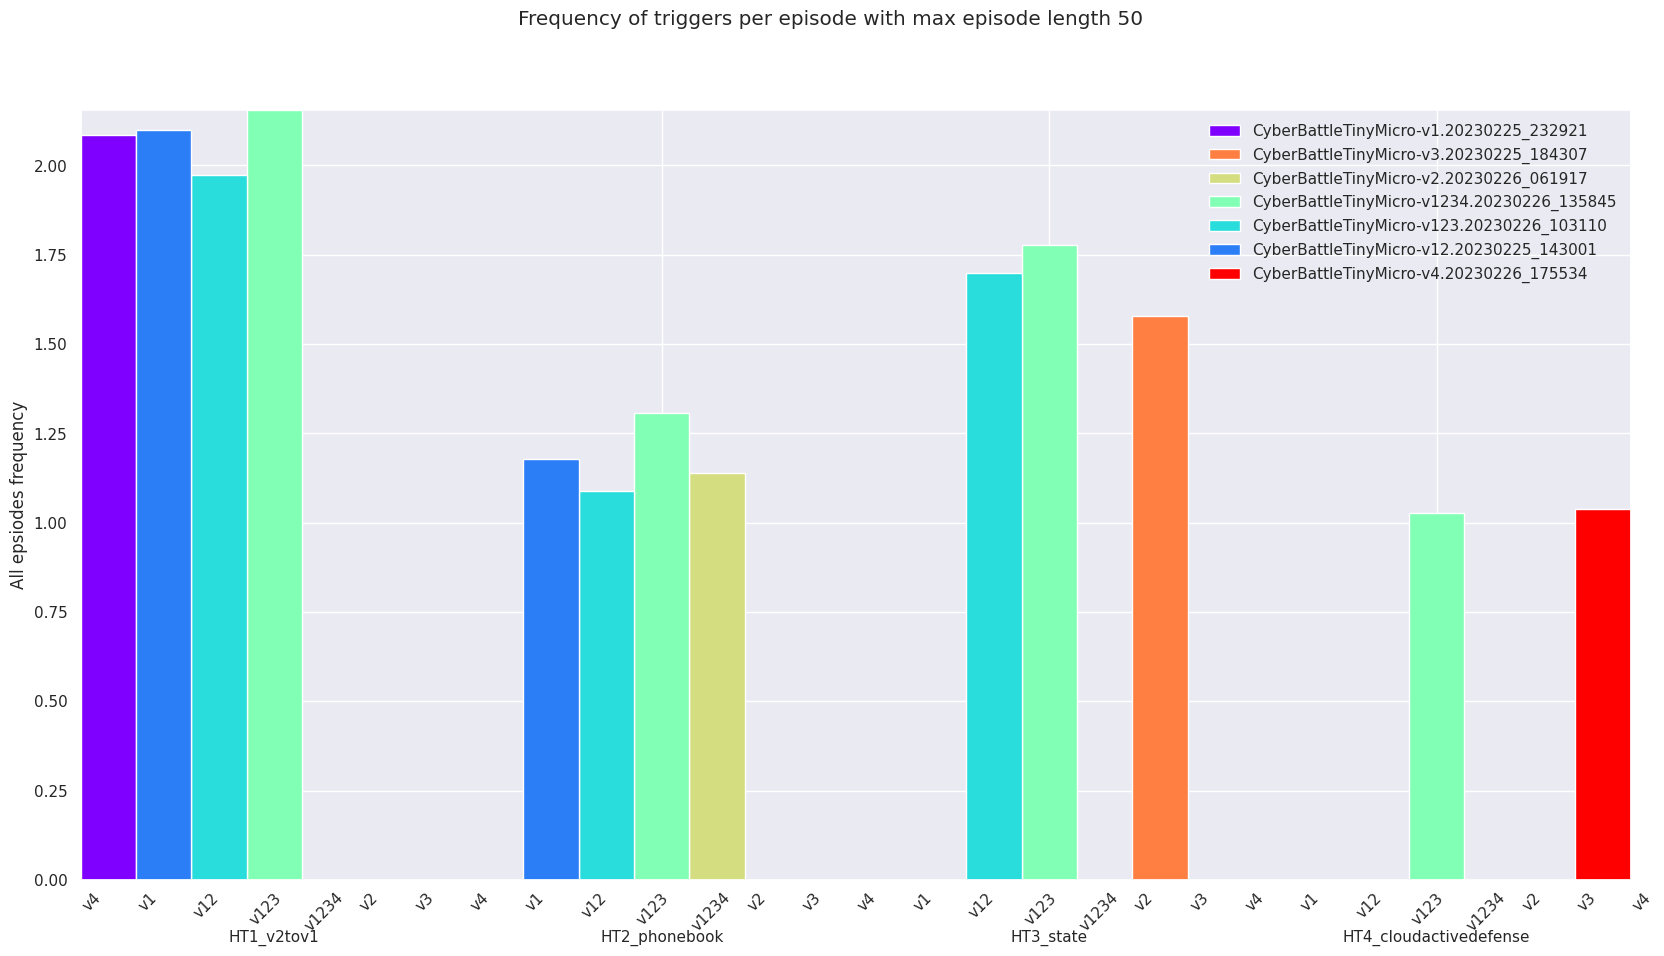

In [ ]:
sns.set(style="darkgrid", color_codes=True) # 
# nrows, ncols = max(len(expers[gymid]) for gymid in expers), len(expers)
# axes = {}
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

N, M = len(dp_names), len(exper_names)
w_N = 1/N
w_M = w_N/M

color = cm.rainbow(np.linspace(0, 1, M))
n_last_episodes = 0 # 50 # for all episodes (=0)
freq_not_count = False
for exper_ht_dp_name in detection_points_indices:
    # construct axes in fig, and log its index (i, j) inside axes
    gymid, date, detection_point = exper_ht_dp_name.split('.')
    exper_name = gymid + '.' + date
    exper_index, dp_index = exper_names.index(exper_name), dp_names.index(detection_point)
    # j, i = list(expers.keys()).index(gymid), expers[gymid].index(date) # get indices of "gymid: date" inside (key, val) pair 
    # if (i, j) not in axes:
    #     ax = fig.add_subplot(nrows, ncols, i * ncols + j + 1)
    #     axes[(i, j)] = ax
    # else:
    #     ax = axes[(i, j)]
    
    n_nonzero = len(detection_points_indices[exper_ht_dp_name]['indices'])
    N_episodes = len(detection_points_indices[exper_ht_dp_name]['eplength'])
    # n_episodes x 50
    all_occur = scipy.sparse.csr_matrix(([True] * n_nonzero, detection_points_indices[exper_ht_dp_name]['indices'], 
                                         detection_points_indices[exper_ht_dp_name]['indptr']), 
                                         shape=(N_episodes, max_episode_steps))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    # only episodes which have nonzero inclusions
    if freq_not_count:
        freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0] / \
            detection_points_indices[exper_ht_dp_name]['eplength'][-n_last_episodes:][n_occur_per_episode[-n_last_episodes:] > 0]
    else:
        freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0]
    freq_occur_per_episode = freq_occur_per_episode if len(freq_occur_per_episode) else [0, 0, 0]
    ax.bar(w_M / 2 + dp_index / N + exper_index * w_M, freq_occur_per_episode.mean(), width=w_M, color=color[exper_index], align='center', label=exper_name)
    # ax.plot(np.arange(len(n_occur_per_episode))[n_occur_per_episode > 0], freq_occur_per_episode, label=detection_point)
# ax.set_xlabel("Episode")
ax.set_ylabel(f"Last {n_last_episodes} "*(n_last_episodes != 0) + (not n_last_episodes)*"All "+ "epsiodes frequency")
    # ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
    # eplength = len(detection_points_indices[exper_ht_dp_name]['eplength'])
    # ax.set_xlim(0, eplength)
    # ax.set_title(gymid + '.' + date)
# extraxticks = [len(detection_points_indices[exper_ht_dp_name]['eplength'])]
# ax.set_xticks(list(ax.get_xticks()) + extraxticks)
ax.xaxis.set_major_locator(plt.FixedLocator(np.linspace(0, 1, N+1)[:-1] + w_N/2))
ax.xaxis.set_major_formatter(plt.FixedFormatter(dp_names))
ax.xaxis.set_minor_locator(plt.FixedLocator(np.linspace(0, 1, N*M+1))) # - w_M/2))
ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda val, tick_number: exper_names[(tick_number - 1) % M].split('-')[1].split('.')[0]))
ax.tick_params(axis='x', pad=30)
plt.setp( ax.xaxis.get_minorticklabels(), rotation=45, ha='left')
# for tick in ax.xaxis.get_minor_ticks():
#     tick.label1.set_rotation(45)
#     tick.label1.set_rotation(45)
# plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
ax.autoscale(tight=True)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=False)

_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")
